Importing relevant modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Importing our cleaned dataset

In [4]:
file_name = "final_data_endelig_endelig.csv"

In [5]:
path = os.getcwd()[:-20] + "final data\\" + file_name
path

'C:\\Users\\danib\\Coding outside home\\ISDS2021\\ISDS2021_grp24\\Exam\\final data\\final_data_endelig_endelig.csv'

In [6]:
df = pd.read_csv(path)

C:\Users\danib\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Finding the top 10 tags

In [8]:
all_tags = list(df.columns[35:-4])

tags, counts = [], []

for t in all_tags:
    count = df[t].mean() #Computing the mean of each tag to get their prominense in percent
    counts.append(count)
    tags.append(t)

tdict = (dict(zip(tags, counts))) #Storing the tags and their respective means in a dictionary

In [9]:
from operator import itemgetter

top10 = dict(sorted(tdict.items(), key = itemgetter(1), reverse = True)[:10]) #Sorting the dictionary based on their values.  
top10

{'Singleplayer': 0.6487285005803525,
 'Indie': 0.5935422602089269,
 'Action': 0.46575920649994723,
 'Adventure': 0.441911997467553,
 'Casual': 0.3357602616861876,
 'Simulation': 0.28743273187717633,
 'Strategy': 0.2764587949773135,
 'Atmospheric': 0.2692835285427878,
 '2D': 0.2652738208293764,
 'Multiplayer': 0.23942175794027645}

Function: For a list of features, return a series of violinplots for their distribution of prices and save it as a png-file.

In [26]:
def TagsViolinplotted(df, feature_list, def_value=1, price="price"):
    passed = []
    for f in feature_list:
        if df[df[f]==def_value]["price"].mean() > 0: #Ignore any features with a mean less than 0.
            passed.append(f)
    
    fig, axs = plt.subplots(1, len(passed), figsize=(18, 10), sharey=True, sharex=True) #Create nr of subplots equal to nr of features
    fig_nr = 0
    
    for p in passed: 
        col = sns.color_palette("pastel")[fig_nr]
        
        vplot = sns.violinplot(y=df[df[p]==def_value][price], data = df[df[p]==def_value], ax=axs[fig_nr], color=col) #Violinplot
        vplot.set_yticklabels(vplot.get_yticks(), size = 17) #Increase font size of yticks
        
        axs[fig_nr].spines["top"].set_visible(False) #Remove spines
        axs[fig_nr].spines["right"].set_visible(False) 
        
        if fig_nr > 0: # ... and left spine for all but the first subplot
            axs[fig_nr].spines["left"].set_visible(False)

        axs[fig_nr].set_xlabel(p, fontsize=17) #Increase font sizes
        axs[fig_nr].set(ylabel="")
        
        axs[0].set_ylabel("Price in US Dollars",fontsize=17) #Set y label
        
        fig_nr += 1
    
    fig = plt.gcf()
    fig.suptitle("Distribution of price for top 10 most popular tags", fontsize=20) # Set title
    
    plt.show
    plt.savefig("top10violins.png", dpi=120)

<ipython-input-26-7417ea235598>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  vplot.set_yticklabels(vplot.get_yticks(), size = 17)
<ipython-input-26-7417ea235598>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  vplot.set_yticklabels(vplot.get_yticks(), size = 17)
<ipython-input-26-7417ea235598>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  vplot.set_yticklabels(vplot.get_yticks(), size = 17)
<ipython-input-26-7417ea235598>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  vplot.set_yticklabels(vplot.get_yticks(), size = 17)
<ipython-input-26-7417ea235598>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  vplot.set_yticklabels(vplot.get_yticks(), size = 17)
<ipython-input-26-7417ea235598>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  vplot.set_yticklabels(vplot.get_yticks(), size = 17)
<ipy

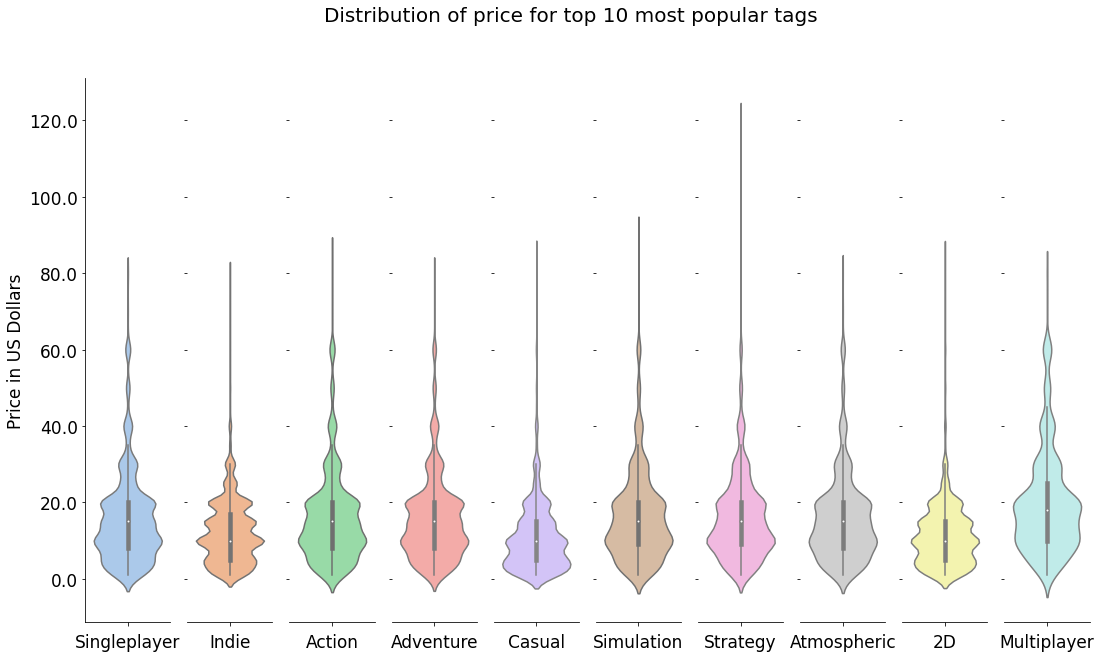

In [27]:
top10violins = TagsViolinplotted(df, top10, def_value=1, price="price")

Correlation matrix among top 10 tags

In [30]:
dftop10 = pd.DataFrame()
for t in top10:
    dftop10[t] = df[t]

In [32]:
dftop10.corr()

,Singleplayer,Indie,Action,Adventure,Casual,Simulation,Strategy,Atmospheric,2D,Multiplayer
Singleplayer,1.000000,0.137216,0.136710,0.210588,0.034049,0.036565,0.068368,0.235921,0.149253,0.112422
Indie,0.137216,1.000000,0.016411,0.097871,0.193037,0.040914,0.045594,0.024351,0.172668,-0.118180
Action,0.136710,0.016411,1.000000,0.141161,-0.157689,-0.141966,-0.167095,0.057407,-0.006669,0.249437
Adventure,0.210588,0.097871,0.141161,1.000000,-0.034267,-0.154354,-0.144808,0.306193,0.048626,-0.049143
Casual,0.034049,0.193037,-0.157689,-0.034267,1.000000,0.088072,0.011145,-0.033174,0.144189,-0.074267
Simulation,0.036565,0.040914,-0.141966,-0.154354,0.088072,1.000000,0.252800,-0.063352,-0.110698,0.070928
Strategy,0.068368,0.045594,-0.167095,-0.144808,0.011145,0.252800,1.000000,-0.090695,0.027780,0.079457
Atmospheric,0.235921,0.024351,0.057407,0.306193,-0.033174,-0.063352,-0.090695,1.000000,-0.020464,-0.017840
2D,0.149253,0.172668,-0.006669,0.048626,0.144189,-0.110698,0.027780,-0.020464,1.000000,-0.140533
Multiplayer,0.112422,-0.118180,0.249437,-0.049143,-0.074267,0.070928,0.079457,-0.017840,-0.140533,1.000000
